In [1]:
import pandas as pd 
import numpy as np
from __future__ import unicode_literals
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Editing the data a bit
kick_data = pd.read_csv("/Users/briankalinowski/Kickstarter-Data-Analysis/most_backed.csv")

del kick_data['Unnamed: 0']


In [3]:
#rename some columns
kick_data.rename(columns = {'amt.pledged' : 'pledged_amount'}, inplace=True)
kick_data.rename(columns = {'pledge.tier' : 'pledge_tier'}, inplace=True)
kick_data.rename(columns = {'num.backers' : 'backers'}, inplace=True)
kick_data.rename(columns = {'num.backers.tier' : 'backers_by_tier'}, inplace=True)
kick_data.rename(columns = {'blurb' : 'pitch'}, inplace=True)

#Create a column for the number of tiers for each project. 

# kick_usd = kick_data.loc[kick_data['currency'] == 'usd']
# kick_tiers = [len(row.split()) for row in kick_usd['pledge_tier']]
# kick_data['num_tiers'] = pd.Series(kick_tiers, index = kick_usd.index)

In [8]:
kick_data.to_csv('Kick_funded.csv')



In [4]:
# Reading in the data
kick_data = pd.read_csv("/Users/briankalinowski/Kickstarter-Data-Analysis/Kick_funded.csv")
del kick_data['Unnamed: 0']




In [5]:
#4000 of the most funded campaigns that were on Kickstarter.
kick_data.head(100)


,pledged_amount,pitch,by,category,currency,goal,location,backers,backers_by_tier,pledge_tier,title,url,num_tiers
0,8782571.0,\nThis is a card game for people who are into ...,Elan Lee,Tabletop Games,usd,10000.0,"Los Angeles, CA",219382,"[15505, 202934, 200, 5]","[20.0, 35.0, 100.0, 500.0]",Exploding Kittens,/projects/elanlee/exploding-kittens,4.0
1,6465690.0,"\nAn unusually addicting, high-quality desk to...",Matthew and Mark McLachlan,Product Design,usd,15000.0,"Denver, CO",154926,"[788, 250, 43073, 21796, 41727, 21627, 12215, ...","[1.0, 14.0, 19.0, 19.0, 35.0, 35.0, 79.0, 79.0...",Fidget Cube: A Vinyl Desk Toy,/projects/antsylabs/fidget-cube-a-vinyl-desk-toy,12.0
2,5408916.0,\nBring Reading Rainbow’s library of interacti...,LeVar Burton & Reading Rainbow,Web,usd,1000000.0,"Los Angeles, CA",105857,"[19639, 14343, 9136, 2259, 5666, 24512, 4957, ...","[5.0, 10.0, 25.0, 30.0, 35.0, 50.0, 75.0, 100....","Bring Reading Rainbow Back for Every Child, Ev...",/projects/readingrainbow/bring-reading-rainbow...,64.0
3,5702153.0,\nUPDATED: This is it. We're making a Veronica...,Rob Thomas,Narrative Film,usd,2000000.0,"San Diego, CA",91585,"[5938, 8423, 11509, 22997, 23227, 1865, 7260, ...","[1.0, 10.0, 25.0, 35.0, 50.0, 75.0, 100.0, 150...",The Veronica Mars Movie Project,/projects/559914737/the-veronica-mars-movie-pr...,32.0
4,3336371.0,"\nAn adventure game from Tim Schafer, Double F...",Double Fine and 2 Player Productions,Video Games,usd,400000.0,"San Francisco, CA",87142,"[47946, 24636, 1090, 11530, 900, 148, 100, 10, 4]","[15.0, 30.0, 60.0, 100.0, 250.0, 500.0, 1000.0...",Double Fine Adventure,/projects/doublefine/double-fine-adventure,9.0
5,20338986.0,\nColor e-paper smartwatch with up to 7 days o...,Pebble Technology,Product Design,usd,500000.0,"Palo Alto, CA",78471,"[10000, 22991, 5278, 19999, 6041, 4717, 4998, ...","[159.0, 179.0, 179.0, 250.0, 250.0, 338.0, 400...","Pebble Time - Awesome Smartwatch, No Compromises",/projects/597507018/pebble-time-awesome-smartw...,12.0
6,4188927.0,\nA story-driven CRPG set in the world of Mont...,inXile entertainment,Video Games,usd,900000.0,"Newport Beach, CA",74405,"[317, 14992, 11711, 10995, 4303, 3503, 10271, ...","[5.0, 20.0, 25.0, 28.0, 35.0, 39.0, 45.0, 50.0...",Torment: Tides of Numenera,/projects/inxile/torment-tides-of-numenera,28.0
7,3986929.0,"\nPillars of Eternity is an isometric, party-b...",Obsidian Entertainment,Video Games,usd,1100000.0,"Irvine, CA",73986,"[317, 25000, 20921, 8394, 5727, 3818, 769, 104...","[5.0, 20.0, 25.0, 35.0, 50.0, 65.0, 80.0, 100....",Pillars of Eternity (formerly Project Eternity),/projects/obsidian/project-eternity,21.0
8,2090104.0,\nThe creative talent behind Banjo-Kazooie and...,Playtonic Games,Video Games,gbp,175000.0,"Derby, UK",73206,"[1324, 22974, 21683, 6821, 5140, 5859, 149, 49...","[8.0, 15.0, 23.0, 31.0, 46.0, 54.0, 85.0, 85.0...",Yooka-Laylee - A 3D Platformer Rare-vival!,/projects/playtonic/yooka-laylee-a-3d-platform...,NaN
9,3007370.0,\nZNAPS is a magnetic adapter specially design...,ZNAPS,Technology,cad,120000.0,"Toronto, Canada",70122,"[11463, 13904, 97, 4699, 22858, 942, 8267, 454...","[9.0, 9.0, 13.0, 15.0, 17.0, 21.0, 24.0, 42.0,...",ZNAPS - Connection is just a snap away,/projects/1041610927/znaps-the-9-magnetic-adap...,NaN


# Exploratory Analysis

In [6]:
kick_data.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,pledged_amount,goal,backers,num_tiers
count,4.000000e+03,4.000000e+03,4000.000000,3438.000000
mean,2.899923e+05,6.175203e+04,3582.875750,14.598313
std,7.119369e+05,1.266715e+05,7316.102809,10.200610
min,1.925000e+03,1.000000e+00,1109.000000,1.000000
25%,6.771300e+04,1.300000e+04,1406.750000,NaN
50%,1.205860e+05,3.000000e+04,1946.000000,NaN
75%,2.593680e+05,6.000000e+04,3372.000000,NaN
max,2.033899e+07,2.000000e+06,219382.000000,101.000000


In [7]:
kick_data.corr()


,pledged_amount,goal,backers,num_tiers
pledged_amount,1.000000,0.436182,0.717896,0.070394
goal,0.436182,1.000000,0.444587,0.242526
backers,0.717896,0.444587,1.000000,0.074863
num_tiers,0.070394,0.242526,0.074863,1.000000


In [84]:
kick_data.category.value_counts(ascending = False)[0:10]


Product Design    773
Tabletop Games    742
Video Games       524
Hardware          182
Technology        152
Documentary       124
Gadgets           121
Design             99
Comics             79
Wearables          64
Name: category, dtype: int64

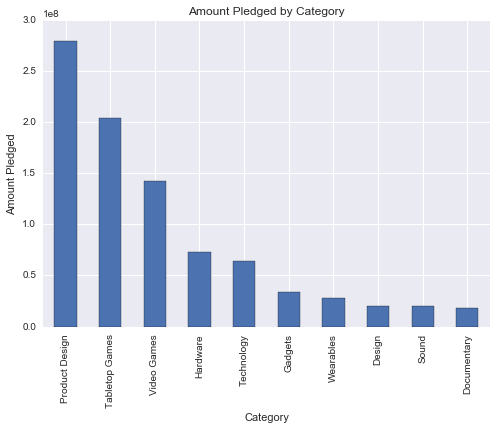

In [93]:
#Total $ amount pledged by category. 

amt_pledged = kick_data['pledged_amount'].groupby(kick_data['category'])
pledged = amt_pledged.sum().sort_values(ascending=0)[0:10]


ax = pledged.plot(kind="bar")
ax.set_title("Amount Pledged by Category")
ax.set_ylabel("Amount Pledged")
ax.set_xlabel("Category")
vals = ax.get_yticks()


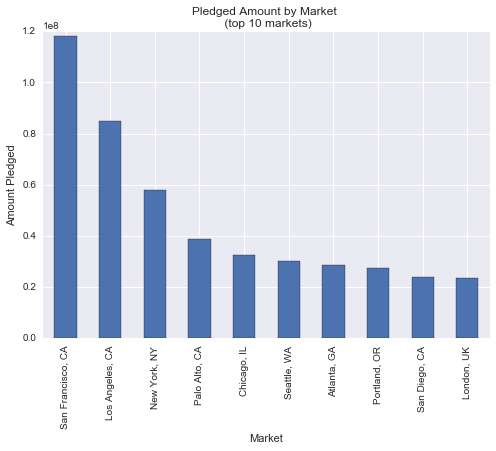

In [95]:
# Amount pledged by location.

amt_locations = kick_data['pledged_amount'].groupby(kick_data['location'])
top_10_locations = amt_locations.sum().sort_values(ascending=0)[0:10]

ax = top_10_locations.plot(kind="bar")
ax.set_title("Pledged Amount by Market \n (top 10 markets)")
ax.set_ylabel("Amount Pledged")
ax.set_xlabel("Market")
vals = ax.get_yticks()


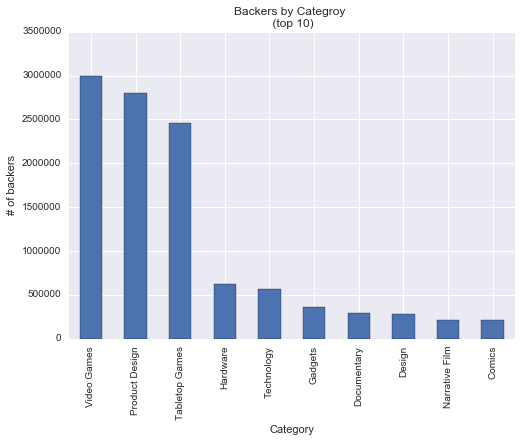

In [98]:
#Amount of backers by category 

backers = kick_data['backers'].groupby(kick_data['category'])
back_cat = backers.sum().sort_values(ascending=0)[0:10]


ax = back_cat.plot(kind="bar")
ax.set_title("Backers by Categroy \n (top 10)")
ax.set_ylabel("# of backers")
ax.set_xlabel("Category")
vals = ax.get_yticks()



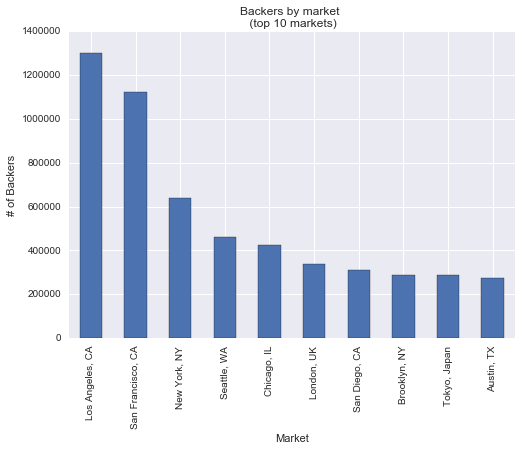

In [99]:
# amount of backers by location.

backed_locations = kick_data['backers'].groupby(kick_data['location'])
top_10_locations = backed_locations.sum().sort_values(ascending=0)[0:10]

ax = top_10_locations.plot(kind="bar")
ax.set_title("Backers by market \n (top 10 markets)")
ax.set_ylabel("# of Backers")
ax.set_xlabel("Market")
vals = ax.get_yticks()


# Linear Regression

In [159]:
#keep only the columns we need for linear regression.

kick_train = kick_data.drop(['pitch','by','currency', 'num_tiers','location','backers_by_tier','pledge_tier', 'url'], axis=1)

In [160]:
train_cols = ['title', 'category', 'backers', 'goal', 'pledged_amount']
kick_train = kick_train.reindex(columns= train_cols)

In [161]:
kick_train['percent_funded'] =(kick_train.pledged_amount / kick_train.goal)

for value in kick_train.percent_funded:
    np.around(value, decimals=1)
    
kick_train.head(500)

,title,category,backers,goal,pledged_amount,percent_funded
0,Exploding Kittens,Tabletop Games,219382,10000.0,8782571.0,878.257100
1,Fidget Cube: A Vinyl Desk Toy,Product Design,154926,15000.0,6465690.0,431.046000
2,"Bring Reading Rainbow Back for Every Child, Ev...",Web,105857,1000000.0,5408916.0,5.408916
3,The Veronica Mars Movie Project,Narrative Film,91585,2000000.0,5702153.0,2.851077
4,Double Fine Adventure,Video Games,87142,400000.0,3336371.0,8.340927
5,"Pebble Time - Awesome Smartwatch, No Compromises",Product Design,78471,500000.0,20338986.0,40.677972
6,Torment: Tides of Numenera,Video Games,74405,900000.0,4188927.0,4.654363
7,Pillars of Eternity (formerly Project Eternity),Video Games,73986,1100000.0,3986929.0,3.624481
8,Yooka-Laylee - A 3D Platformer Rare-vival!,Video Games,73206,175000.0,2090104.0,11.943451
9,ZNAPS - Connection is just a snap away,Technology,70122,120000.0,3007370.0,25.061417


In [162]:
kick_train.corr()

,backers,goal,pledged_amount,percent_funded
backers,1.000000,0.444587,0.717896,0.004182
goal,0.444587,1.000000,0.436182,-0.015837
pledged_amount,0.717896,0.436182,1.000000,-0.003536
percent_funded,0.004182,-0.015837,-0.003536,1.000000


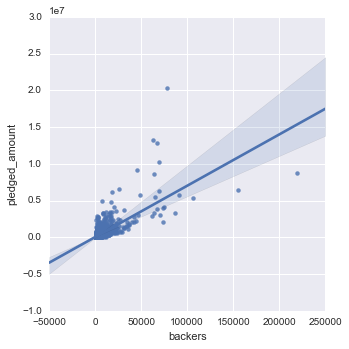

In [113]:
sns.lmplot('backers', 'pledged_amount', kick_train)

In [114]:
log_columns = ['backers','pledged_amount','percent_funded']
log_kick = kick_train.copy()
log_kick[log_columns] = log_kick[log_columns].apply(np.log10)

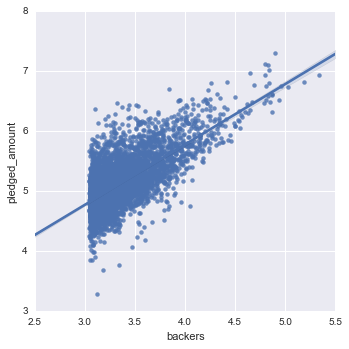

In [115]:
sns.lmplot('backers', 'pledged_amount', log_kick)

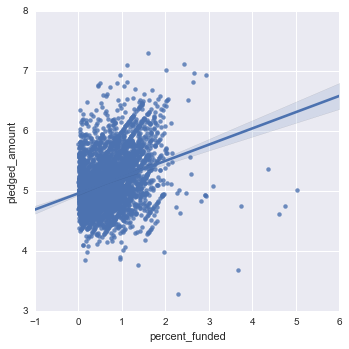

In [116]:
sns.lmplot('percent_funded', 'pledged_amount', log_kick)

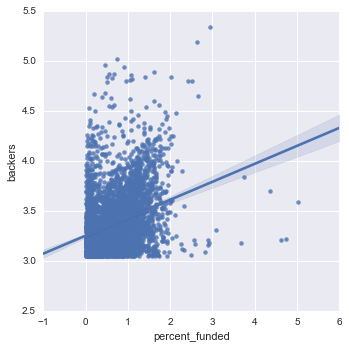

In [118]:
sns.lmplot('percent_funded', 'backers', log_kick)

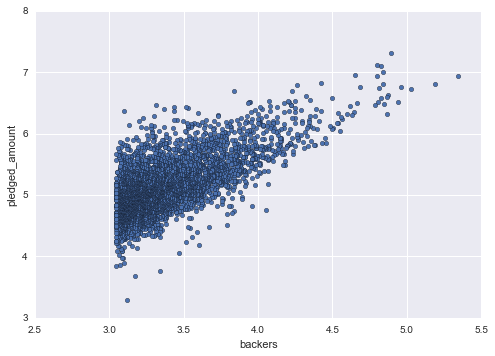

In [184]:
log_kick.plot(kind='scatter', x='backers', y='pledged_amount')

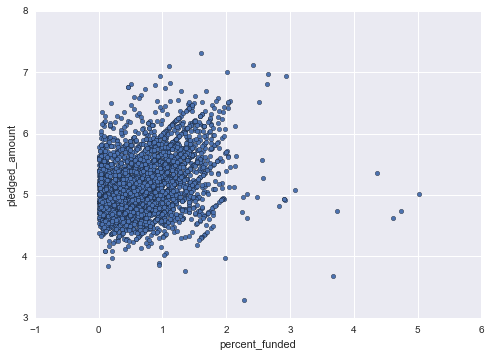

In [119]:
log_kick.plot(kind='scatter', x='percent_funded', y='pledged_amount')


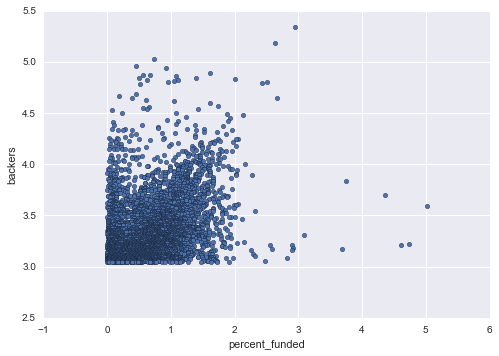

In [120]:
log_kick.plot(kind='scatter', x='percent_funded', y='backers')

In [216]:
from sklearn import feature_selection, linear_model
import statsmodels.api as sm
from sklearn.model_selection import train_test_split



### Functions to Plot by each category

In [ ]:
def plot_category(category):
    kick_test = kick_train.loc[kick_data['category'] == category]
    kick_test.plot(kind='scatter', x='backers', y='pledged_amount')
    X = kick_test[["backers"]]
    Y = kick_test["pledged_amount"]

In [251]:
# a function to fit a regression on each category

def ols_reg(category):
    kick_test = kick_train.loc[kick_data['category'] == category]
    X = kick_test[["backers"]]
    Y = kick_test["pledged_amount"]
    model = sm.OLS(Y, X)
    results = model.fit()
    print(results.summary())
kick_train.category.unique()

array(['Tabletop Games', 'Product Design', 'Web', 'Narrative Film',
       'Video Games', 'Technology', 'Gaming Hardware', 'Television',
       'Hardware', 'Music', 'Space Exploration', 'Radio &amp; Podcasts',
       'Flight', 'Sound', 'Animation', 'Games', 'Action', 'Gadgets',
       'Documentary', '3D Printing', 'DIY Electronics', 'Publishing',
       'Fashion', 'Comics', 'Typography', "Children's Books", 'Apparel',
       'Food', 'Crafts', 'Camera Equipment', 'Comedy', 'Design',
       'Graphic Design', 'Apps', 'Hip-Hop', 'World Music',
       'Film &amp; Video', 'Drinks', 'Wearables', 'Accessories',
       'Footwear', 'Science Fiction', 'Art Books', 'Nonfiction', 'Robots',
       'Art', 'Software', 'Chiptune', 'Webseries', 'Webcomics', 'Rock',
       'Playing Cards', 'Cookbooks', 'Fantasy', 'Photography',
       'Anthologies', 'Faith', 'Mixed Media', 'Metal', 'Small Batch',
       'Classical Music', 'Architecture', 'Pop', 'Dance',
       'Electronic Music', 'Graphic Novels', 'Music

                            OLS Regression Results                            
Dep. Variable:         pledged_amount   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     3253.
Date:                Sun, 27 Nov 2016   Prob (F-statistic):          1.18e-226
Time:                        23:55:23   Log-Likelihood:                -7258.5
No. Observations:                 524   AIC:                         1.452e+04
Df Residuals:                     523   BIC:                         1.452e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
backers       53.3043      0.935     57.035      0.0

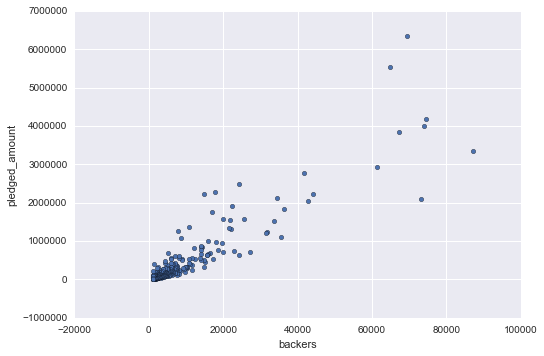

In [252]:
c = 'Video Games'
ols_reg(c)
plot_category(c)

## Test and Training sets

In [305]:
X = log_kick[["backers"]]
y = log_kick["pledged_amount"]

#Spliting testing and train.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)


# Fiting the linear model
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)

# Print the coefficients
print results.intercept_, results.coef_


1.78961306388 [ 0.99363581]


In [315]:
model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:         pledged_amount   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.837e+05
Date:                Mon, 28 Nov 2016   Prob (F-statistic):               0.00
Time:                        01:17:46   Log-Likelihood:                -856.79
No. Observations:                2000   AIC:                             1716.
Df Residuals:                    1999   BIC:                             1721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
backers        1.5204      0.002    619.469      0.0

In [307]:
test_model = sm.OLS(y_test, X_test)
test_results = model.fit()

print (test_results.summary())

                            OLS Regression Results                            
Dep. Variable:         pledged_amount   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 3.837e+05
Date:                Mon, 28 Nov 2016   Prob (F-statistic):               0.00
Time:                        01:09:04   Log-Likelihood:                -856.79
No. Observations:                2000   AIC:                             1716.
Df Residuals:                    1999   BIC:                             1721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
backers        1.5204      0.002    619.469      0.0

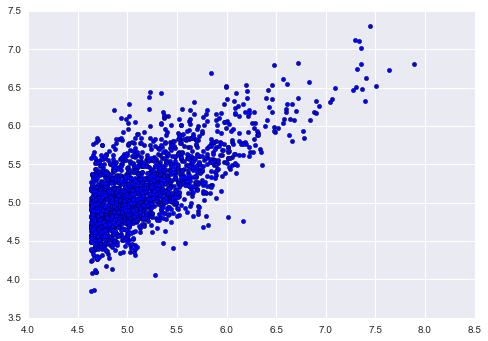

Predictions: [ 4.9404742   5.54392683  4.68419586 ...,  5.22091273  4.64180615
  4.67259849]
Residual: [-0.3498664   0.10323796  0.13193934 ...,  1.15186307  0.31981424
  0.31327238]
P Values: [  4.11328545e-304]
Coefficients: [ 1.52017783]
y-intercept: 0.0
R-Squared: 0.377934607066


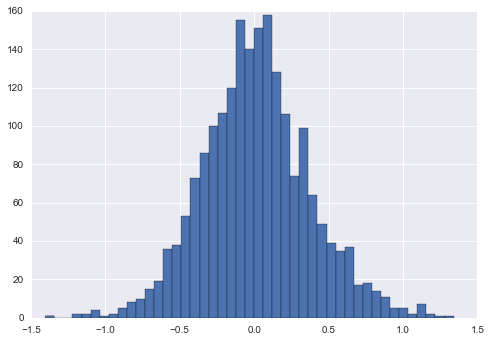

In [316]:
def get_linear_model_metrics(X, y, algo):
    pvals = feature_selection.f_regression(X, Y)[1]
   
    algo.fit(X,Y)
    
    predictions = algo.predict(X)
    plt.scatter(predictions, Y)
    plt.show()
    print "Predictions: " + str(predictions)
    residuals = (Y-algo.predict(X)).values
    print "Residual: " + str(residuals)

    print 'P Values:', pvals
    print 'Coefficients:', algo.coef_
    print 'y-intercept:', algo.intercept_
    print 'R-Squared:', algo.score(X,Y)
    plt.figure()
    plt.hist(residuals, bins=np.ceil(np.sqrt(len(Y))))
    
    
    return algo

backers_X = X_test
amt_Y = y_test
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(backers_X, amt_Y, lm)

# Working with some live Kickstater projects


In [286]:
kick_live = pd.read_csv("/Users/briankalinowski/Kickstarter-Data-Analysis/live.csv")
del kick_live['Unnamed: 0']

In [287]:
live_data = kick_live.drop(['blurb','by','currency','location','state','type','url'], axis=1)

train_cols = ['title', 'amt.pledged','percentage.funded']
live_data = kick_live.reindex(columns= train_cols)

In [288]:
live_data.head(100)

,title,amt.pledged,percentage.funded
0,"Catalysts, Explorers & Secret Keepers: Women o...",15823.0,186
1,The Whatamagump (a hand-crafted story picture ...,6859.0,8
2,Not Drunk Enough Volume 1!,17906.0,102
3,Our Cats Are More Famous Than Us: A Johnny Wan...,67081.0,191
4,The Rwanda Craft Brewery Project,32772.0,34
5,Shiraz the Cookbook,2065.0,114
6,Polygons | The Flat 4-in-1 Measuring Spoon,577844.0,5778
7,Illumination: The Art of Lee White,4952.0,42
8,GOOK - A Korean American LA Riots Film,45959.0,153
9,Picbot - An Automated Motorized Picture And Vi...,214035.0,611


In [289]:
live_data.sort_values(by='amt.pledged', ascending=0)

,title,amt.pledged,percentage.funded
113,Bears vs Babies - A Card Game,1827576.0,18275
465,The First Desktop Waterjet Cutter,1425170.0,1425
66,Fizzics Waytap | Untap the full taste of beer ...,933349.0,1866
110,Deep Madness,676459.0,676
6,Polygons | The Flat 4-in-1 Measuring Spoon,577844.0,5778
96,"Remix IO - A 4K, Nougat-powered, All-in-One de...",439909.0,175
1382,Mutant: Elysium - rollspel om mänsklighetens s...,383199.0,766
202,MAG-LEV Audio | The First Levitating Turntable,380953.0,126
109,que Bottle: The Fashionable & Collapsible Trav...,379740.0,1898
531,Gocycle - the BEST folding electric bike in th...,369660.0,147


In [290]:
funded_pro = live_data.loc[live_data['percentage.funded'] >= 100]
funded_pro.sort_values(by='percentage.funded', ascending=0)


,title,amt.pledged,percentage.funded
84,SpaceTime Coordinates Memento ~ your personal ...,27997.0,27997
1161,Key to the City: London,18562.0,18562
113,Bears vs Babies - A Card Game,1827576.0,18275
357,"THE KICKST-ART-BOOK: A ""KICKSTART OUR KICKSTAR...",11039.0,11380
6,Polygons | The Flat 4-in-1 Measuring Spoon,577844.0,5778
67,Steal This Game,45469.0,4546
3227,Solaris - Enrich Your Atmosphere,20878.0,4175
3187,TileScape DUNGEONS,12464.0,4154
986,"Switch - A fast-paced, ditch your hand card game",553.0,3686
1235,Relieve Pain & Get Weight off your Shoulder w/...,353615.0,3536


In [291]:
log_columns_live = ['amt.pledged','percentage.funded']
live_log = live_data.copy()
live_log[log_columns_live] = live_log[log_columns_live].apply(np.log10)

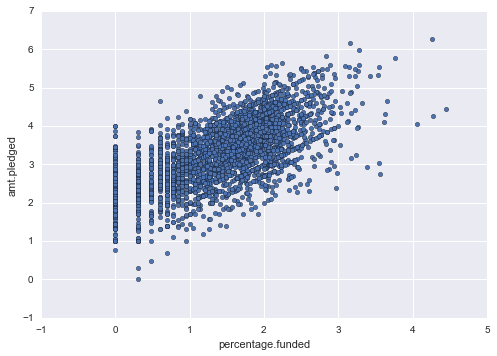

In [308]:
live_log.plot(kind='scatter', x='percentage.funded', y='amt.pledged')

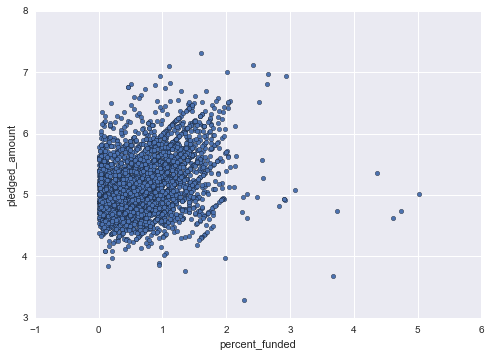

In [309]:
log_kick.plot(kind='scatter', x='percent_funded', y='pledged_amount')


In [327]:
P = log_kick[["percent_funded"]]
b = log_kick["pledged_amount"]

#Spliting testing and train.
P_train, P_test, b_train, b_test = train_test_split(P, b, test_size=0.5, random_state=0)


# Fiting the linear model
model_2 = linear_model.LinearRegression()
results = model_2.fit(P_train, b_train)

# Print the coefficients
print results.intercept_, results.coef_

4.96739084127 [ 0.2453515]


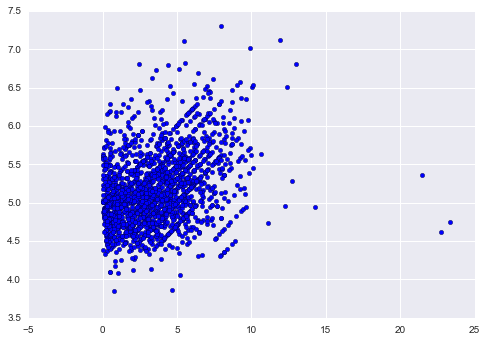

Predictions: [  2.04082567   7.24266541   0.33453028 ...,   6.75870759  12.23215265
   1.41252421]
Residual: [ 2.54978213 -1.59550062  4.48160492 ..., -0.38593178 -7.27053226
  3.57334666]
P Values: [  1.88294139e-50]
Coefficients: [ 4.92338776]
y-intercept: 0.0
R-Squared: -38.4357177609


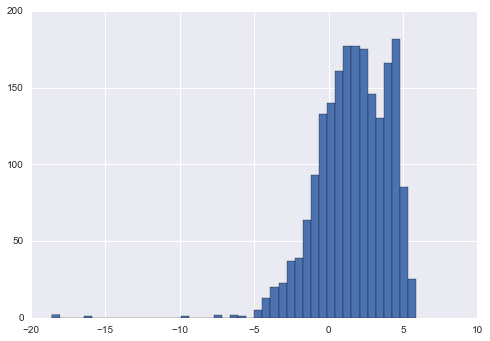

In [328]:
lm = linear_model.LinearRegression(fit_intercept=False)
lm = get_linear_model_metrics(P_test, b_test, lm)